In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# load the customer data into a DataFrame
customer_df = pd.read_csv('Country-data.csv')

# Check the first 5 rows
customer_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Text(0, 0.5, 'Exports')

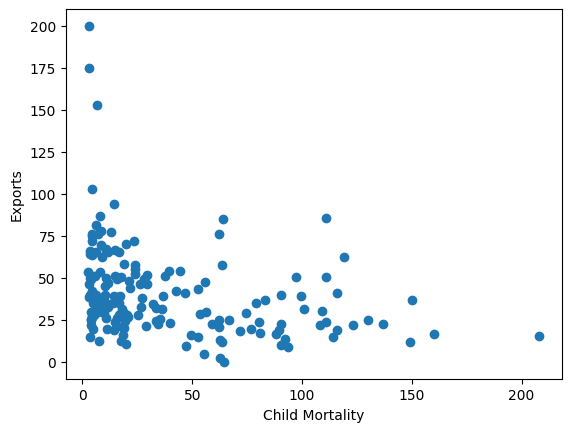

In [5]:
plt.scatter(customer_df["child_mort"], 
            customer_df["exports"])

plt.xlabel("Child Mortality")
plt.ylabel("Exports")

In [13]:
relevant_cols = ["child_mort", "exports"]

customer_df = customer_df[relevant_cols]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(customer_df)

scaled_data = scaler.transform(customer_df)
df_scaled=pd.DataFrame(scaled_data)

print(df_scaled)

            0         1
0    1.291532 -1.138280
1   -0.538949 -0.479658
2   -0.272833 -0.099122
3    2.007808  0.775381
4   -0.695634  0.160668
..        ...       ...
162 -0.225578  0.200917
163 -0.526514 -0.461363
164 -0.372315  1.130305
165  0.448417 -0.406478
166  1.114951 -0.150348

[167 rows x 2 columns]


In [14]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [15]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()
    



c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

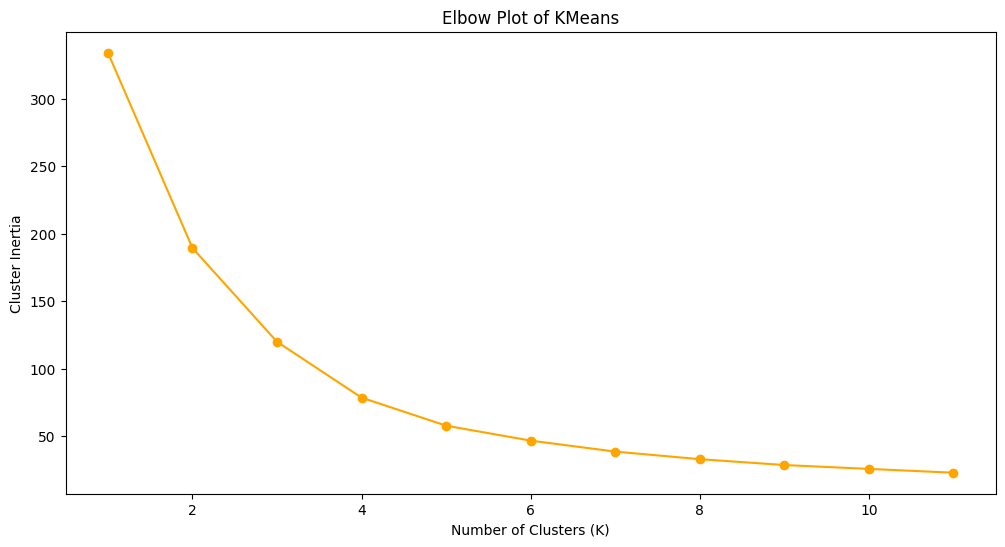

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [29]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)
kmeans_model = KMeans(n_clusters = 4)

kmeans_model.fit(scaled_data)


Text(0.5, 0, 'Exports')

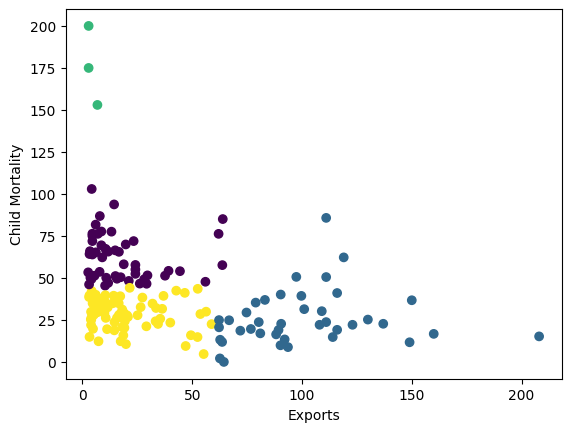

In [30]:
customer_df["clusters"] = kmeans_model.labels_

customer_df.head()
plt.scatter(customer_df["child_mort"], 
            customer_df["exports"], 
            c = customer_df["clusters"])
plt.ylabel("Child Mortality")
plt.xlabel("Exports")